# Predictive Analysis for Credit Card Applications

### Team Member:
 Husain Ghadiali,Guang Yang,Weichu Zou,Tzu-Ching Chou,Lokendra Badgujar

## Content
### 1.Problem Definition
### 2.Introduction and Motivation
### 3.Report Summary
### 4.Data Ovewview
### 5.Data Cleaning Process
### 6.Explorartory Analysis
### 7.Dashboard
### 8.Conclusion

### 1.Problem Definition:

Our goal is to explore trends, clusters and relationship between different factors affecting applicants who apply for a loan and compare that to the credit payment behaviour of applicants who were approved for a loan. We will be using SQL and visualizations on a credit card applications dataset. The dataset includes two tables; one for applicants who apply for a loan and other for credit payment behavior of applicants who have a loan. 

The goal of this project is to explore the relationships between various factors and affecting applicants w

### Data Source Link:

Source: Credit Card Approval Prediction (https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction)

### 2.Introduction and Motivation

Credit card payment defaults are a huge cause of concern for the banking industry and the outstanding balances have only been increasing with time over the past years. Research has shown that Americans’ total credit card balance is $887 billion in the second quarter of 2022, according to the latest consumer debt data from the Federal Reserve Bank of New York. That’s a $46 billion jump from $841 billion in the first quarter of 2022. Despite the high levels of debt and repayment defaults that the companies face, they must extend their services to more people to gain profits. Our primary goal with this project is to analyze the data of the applicants that have applied for a credit card and understand the factors that contribute to the acceptance of credit card applicants. We will also be using a complimentary dataset consisting of users that did receive the credit card in order to understand the difference in the analysis between the applicants and the card holders. We will be using a publicly available dataset from Kaggle that holds credit card applicants’ data as well as the credit card holders’ data.  

### 3.Report Summary

Our analysis of the credit card applications proved to be really insightful, and we were able to find some significant observations from the datasets. The most crucial insights from the analysis are as follows:
1.As of the applicants that apply for a credit card, a significant portion of them have a lesser income.
2.More married people apply for a credit card. We presume this relates to the fact that spending increases with family size increasing and therefore more people find it needful to apply for a credit card.
3.On comparison of the demographic between people that apply and the people that do successfully get a credit card, we observed that there does not appear to be a significant difference on factors such as age, gender, or house types. The factors stay consistent among both the groups.
4.An interesting observation was that in comparison to the proportion of the categories of occupation types from the people that did apply, few occupations had a higher rate of acceptance even if the age of the applicants were lower. We noticed that IT and Tech jobs had a higher acceptance rate for lower age brackets. This does align factually as people in IT and Tech jobs do have a higher pay, thus increasing their chances of getting a credit card.
5.We also observed that the highest percentage of accepted people were having jobs relating to a ‘manager’, proving that they had higher financial stability and decreased risk of defaulting. We also observed that of the applicants, the highest proportion of the people belonged to the labour class.

### 4.Data Overview:

The dataset contains two tables: 'application_record' and 'credit_record'

## Schema & Metadata for 'application_record' table

| Name | Data Type | Description | Explanation |
| --- | --- | --- | --- |
| ID | Integer | Client number | - |
| CODE_GENDER | String | Gender | - |
| FLAG_OWN_CAR | Boolean | Is there a car | - |
| FLAG_OWN_REALTY | Boolean | Is there a property | - |
| CNT_CHILDREN | Integer | Number of children | - |
| AMT_INCOME_TOTAL | Float | Annual income | - |
| NAME_INCOME_TYPE | String | Income category | - |
| NAME_EDUCATION_TYPE | String | Education level | - |
| NAME_FAMILY_STATUS | String | Marital status | - |
| NAME_HOUSING_TYPE | String | Way of living | - |
| DAYS_BIRTH | Integer | Birthday | Count backwards from current day (0), -1 means yesterday |
| DAYS_EMPLOYED | Integer | Start date of employment | Count backwards from current day(0). If positive, it means the person currently unemployed |
| FLAG_MOBIL | Integer | Is there a mobile phone | - |
| FLAG_WORK_PHONE | Integer | Is there a work phone | - |
| FLAG_PHONE | Integer | Is there a phone | - |
| FLAG_EMAIL | Integer | Is there an email | - |
| OCCUPATION_TYPE | String | Occupation | - |
| CNT_FAM_MEMBERS | Float | Family size	 | - |

In [5]:
%%bigquery
SELECT * FROM
ba775-team-project-team3.creditcard.INFORMATION_SCHEMA.TABLES

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.43rows/s]


,table_catalog,table_schema,table_name,table_type,is_insertable_into,is_typed,creation_time,base_table_catalog,base_table_schema,base_table_name,snapshot_time_ms,ddl,default_collation_name,upsert_stream_apply_watermark
0,ba775-team-project-team3,creditcard,application_record,BASE TABLE,YES,NO,2022-10-04 15:15:23.897000+00:00,None,None,None,NaT,CREATE TABLE `ba775-team-project-team3.creditc...,NULL,NaT
1,ba775-team-project-team3,creditcard,credit_record,BASE TABLE,YES,NO,2022-10-04 15:39:17.106000+00:00,None,None,None,NaT,CREATE TABLE `ba775-team-project-team3.creditc...,NULL,NaT


#### Preview of 'application_record' table

The application_record table contains demographic data of credit card applicants. There are 438557 rows and 18 columns in this table

In [1]:
%%bigquery
SELECT *
FROM `ba775-team-project-team3.creditcard.application_record`
LIMIT 5

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.56s/rows]


,f0_
0,6750000.0


#### Schema & Metadata for 'credit_record' table

| Name | Data Type | Description | Explanation |
| --- | --- | --- | --- |
| ID | Integer | Client number | - |
| MONTHS_BALANCE | Integer | Record month | The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on |
| STATUS | String | Status | 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month |

#### Preview of 'credit_record' table

The credit_record table contains data of credit card users' behaviors. There are 1048575 rows and 3 columns in this table

In [14]:
%%bigquery
SELECT *
FROM `ba775-team-project-team3.creditcard.credit_record`
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.23rows/s]


,ID,MONTHS_BALANCE,STATUS
0,5002126,-50,2
1,5002795,-50,2
2,5003267,-50,3
3,5003267,-51,3
4,5003267,-52,2


### 5.Data Cleaning Process:

#### Finding Missing Values

Checking for null vales in all cloumns of the 'application_record' table

In [36]:
%%bigquery
SELECT
    SUM(IF(ID IS NULL,1,0)) AS ID_null,
    SUM(IF(CODE_GENDER IS NULL,1,0)) AS CODE_GENDER_null,
    SUM(IF(FLAG_OWN_CAR IS NULL,1,0)) AS FLAG_OWN_CAR_null,
    SUM(IF(FLAG_OWN_REALTY IS NULL,1,0)) AS FLAG_OWN_REALTY_null,
    SUM(IF(CNT_CHILDREN IS NULL,1,0)) AS CNT_CHILDREN_null,
    SUM(IF(AMT_INCOME_TOTAL IS NULL,1,0)) AS AMT_INCOME_TOTAL_null,
    SUM(IF(NAME_INCOME_TYPE IS NULL,1,0)) AS NAME_INCOME_TYPE_null,
    SUM(IF(NAME_EDUCATION_TYPE IS NULL,1,0)) AS NAME_EDUCATION_TYPE_null,
    SUM(IF(NAME_FAMILY_STATUS IS NULL,1,0)) AS NAME_FAMILY_STATUS_null,
    SUM(IF(NAME_HOUSING_TYPE IS NULL,1,0)) AS NAME_HOUSING_TYPE_null,
    SUM(IF(DAYS_BIRTH IS NULL,1,0)) AS DAYS_BIRTH_null,
    SUM(IF(DAYS_EMPLOYED IS NULL,1,0)) AS DAYS_EMPLOYED_null,
    SUM(IF(FLAG_MOBIL IS NULL,1,0)) AS FLAG_MOBIL_null,
    SUM(IF(FLAG_WORK_PHONE IS NULL,1,0)) AS FLAG_WORK_PHONE_null,
    SUM(IF(FLAG_PHONE IS NULL,1,0)) AS FLAG_PHONE_null,
    SUM(IF(FLAG_EMAIL IS NULL,1,0)) AS FLAG_EMAIL_null,
    SUM(IF(OCCUPATION_TYPE IS NULL,1,0)) AS OCCUPATION_TYPE_null,
    SUM(IF(CNT_FAM_MEMBERS IS NULL,1,0)) AS CNT_FAM_MEMBERS_null
FROM `ba775-team-project-team3.creditcard.application_record`

Downloading: 100%|██████████| 1/1 [00:02<00:00,  2.42s/rows]


,ID_null,CODE_GENDER_null,FLAG_OWN_CAR_null,FLAG_OWN_REALTY_null,CNT_CHILDREN_null,AMT_INCOME_TOTAL_null,NAME_INCOME_TYPE_null,NAME_EDUCATION_TYPE_null,NAME_FAMILY_STATUS_null,NAME_HOUSING_TYPE_null,DAYS_BIRTH_null,DAYS_EMPLOYED_null,FLAG_MOBIL_null,FLAG_WORK_PHONE_null,FLAG_PHONE_null,FLAG_EMAIL_null,OCCUPATION_TYPE_null,CNT_FAM_MEMBERS_null
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,134177,0


Only the cloumn 'OCCUPATION_TYPE' has null values (i.e. 134203 null values). Next we calculate how many values are missing as a percentage of total observations in the 'OCCUPATION_TYPE' column

In [31]:
%%bigquery
SELECT COUNT(OCCUPATION_TYPE) AS total_observvations, 
    ROUND(((SELECT COUNT(*) 
            FROM `ba775-team-project-team3.creditcard.application_record`
            WHERE OCCUPATION_TYPE IS NULL)/ COUNT(*))*100,2) AS percent_null,
FROM `ba775-team-project-team3.creditcard.application_record`

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.42s/rows]


,total_observvations,percent_null
0,304354,30.6


30.6% of values in the 'OCCUPATION_TYPE' column are missing. These missing values could be unkown occupation types or represent groups such as students or unemployed. We will discover more on this in our exploratory analysis

Checking for null vales in all cloumns of the 'credit_record' table

In [3]:
%%bigquery
SELECT
    SUM(IF(ID IS NULL,1,0)) AS ID_null,
    SUM(IF(MONTHS_BALANCE IS NULL,1,0)) AS MONTHS_BALANCE_null,
    SUM(IF(STATUS IS NULL,1,0)) AS STATUS_null
FROM `ba775-team-project-team3.creditcard.credit_record`

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.57s/rows]


,ID_null,MONTHS_BALANCE_null,STATUS_null
0,0,0,0


No values are missing in the 'credit_record' table

#### Handling Missing Values

As per our analysis, if a column contains 50% or more null values, we would remove the column. However, The % of null values in the 'OCCUPATION_TYPE' column are only about 30.60%. Therefore we chose to keep the column as a significant column.

#### Checking For Duplicates

Checking for duplicate records in the 'application_record' table since each record represents an unique application. Not checking for dupliactes in the 'credit_record' table since it represents multiple records of credit payment behaviour for a single ID 

In [33]:
%%bigquery
SELECT ID, COUNT(ID)
FROM `ba775-team-project-team3.creditcard.application_record`
GROUP BY ID
HAVING COUNT(ID)>1

Downloading: 100%|██████████| 47/47 [00:01<00:00, 30.91rows/s]


,ID,f0_
0,7602432,2
1,7090931,2
2,7091721,2
3,7576316,2
4,7046068,2
5,7045885,2
6,7743418,2
7,7207977,2
8,7416167,2
9,7174719,2


47 IDs have 1 dupliacte record each resulting in 94 duplicate records in total

#### Handling Duplicate Values

A closer look at the dupliacte records showed that the dupliacte IDs infact represented two different applicants for each ID rather than one individual with two applications. Since the dupliactes voilate the definition of one record for each application we removed the duplicate records from the 'application_record' table

In [4]:
%%bigquery
DELETE FROM `ba775-team-project-team3.creditcard.application_record`
WHERE ID IN(
  (SELECT ID 
  FROM `ba775-team-project-team3.creditcard.application_record`
  GROUP BY ID
  HAVING COUNT(ID) > 1)
)

Query complete after 0.00s: 100%|██████████| 7/7 [00:00<00:00, 3703.35query/s]                        


""


In [35]:
%%bigquery
SELECT COUNT(*) FROM `ba775-team-project-team3.creditcard.application_record`

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.45s/rows]


,f0_
0,438463


After removing the 94 duplicate records we have 438463 observations in total

In [40]:
%%bigquery
SELECT COUNT(DISTINCT ID) FROM `ba775-team-project-team3.creditcard.application_record`

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.65s/rows]


,f0_
0,438463


The distinct number of IDs match the total number of observations, thus confirming that the table has no duplicate records anymore

## 6.Exploratory Analysis

#### Q1. What is the proportion of Males & Females in the dataset

One third of applicants were females

In [27]:
%%bigquery
SELECT COUNT(*) AS gender_num
FROM `ba775-team-project-team3.creditcard.application_record`
GROUP BY CODE_GENDER;

Downloading: 100%|██████████| 2/2 [00:01<00:00,  1.27rows/s]


,gender_num
0,294378
1,144085


In [28]:
%%bigquery
SELECT COUNT(*) AS total_gender_num, 
    ROUND(((SELECT COUNT(*) 
         FROM `ba775-team-project-team3.creditcard.application_record`
         WHERE CODE_GENDER = 'F')/ COUNT(*))*100,2) AS percent_female
FROM `ba775-team-project-team3.creditcard.application_record`

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.66s/rows]


,total_gender_num,percent_female
0,438463,67.14


In [29]:
%%bigquery
SELECT COUNT(*) AS total_gender_num, 
    ROUND(((SELECT COUNT(*) 
         FROM `ba775-team-project-team3.creditcard.application_record`
         WHERE CODE_GENDER = 'M')/ COUNT(*))*100,2) AS percent_male
FROM `ba775-team-project-team3.creditcard.application_record`

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.43s/rows]


,total_gender_num,percent_male
0,438463,32.86


#### Q2. Does marital status affect the number of people applying for loans?

Result shows that married people are way more likely to apply for a loan than other marital status holders

In [31]:
%%bigquery
SELECT NAME_FAMILY_STATUS AS marital_status, COUNT(*) AS count
FROM `ba775-team-project-team3.creditcard.application_record`
GROUP BY NAME_FAMILY_STATUS
ORDER BY count DESC;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.23rows/s]


,marital_status,count
0,Married,299768
1,Single / not married,55255
2,Civil marriage,36521
3,Separated,27249
4,Widow,19670


#### Q3. Which Occupation type applied most for loans? Does it have a relation with income?

We can observe here that as income increases the number of people applying for loans decreases. Therefore, people in occupations with lower income apply for the loans the most

In [33]:
%%bigquery
SELECT OCCUPATION_TYPE, COUNT(*) AS NO_OF_APPLICANTS, ROUND(AVG(AMT_INCOME_TOTAL),0) AS AVG_INCOME
FROM `ba775-team-project-team3.creditcard.application_record`
GROUP BY OCCUPATION_TYPE
ORDER BY NO_OF_APPLICANTS DESC

Downloading: 100%|██████████| 19/19 [00:01<00:00, 10.80rows/s]


,OCCUPATION_TYPE,NO_OF_APPLICANTS,AVG_INCOME
0,None,134177,170868.0
1,Laborers,78225,179871.0
2,Core staff,42993,190917.0
3,Sales staff,41092,170908.0
4,Managers,35477,282100.0
5,Drivers,26085,202062.0
6,High skill tech staff,17283,195712.0
7,Accountants,15980,215130.0
8,Medicine staff,13518,168112.0
9,Cooking staff,8074,155859.0


#### Q4. Does martital status and occupation have any relation?

People with lower income tend to have a 'married' marital status compared to higher income people who are less likely to be married

In [35]:
%%bigquery
SELECT NAME_FAMILY_STATUS AS marital_status, OCCUPATION_TYPE, COUNT(*) AS count
FROM `ba775-team-project-team3.creditcard.application_record`
GROUP BY NAME_FAMILY_STATUS, OCCUPATION_TYPE
ORDER BY count DESC;

Downloading: 100%|██████████| 94/94 [00:01<00:00, 55.46rows/s]


,marital_status,OCCUPATION_TYPE,count
0,Married,None,87093
1,Married,Laborers,55214
2,Married,Core staff,30209
3,Married,Sales staff,26357
4,Married,Managers,26338
...,...,...,...
89,Civil marriage,HR staff,42
90,Widow,Low-skill Laborers,36
91,Widow,Waiters/barmen staff,29
92,Civil marriage,IT staff,24


#### Q5. What percentage of young people (18-24 years old) have credit card?

In [37]:
%%bigquery
SELECT  
  CASE  
    WHEN (DAYS_BIRTH / -365) < 18 THEN 'under 18 years old'
    WHEN (DAYS_BIRTH / -365) >= 18  AND (DAYS_BIRTH / -365) <= 24 THEN '18-24 years old'
    WHEN (DAYS_BIRTH / -365) > 24  AND (DAYS_BIRTH / -365) <= 30 THEN '25-30 years old'
    WHEN (DAYS_BIRTH / -365) > 30  AND (DAYS_BIRTH / -365) <= 40 THEN '30-40 years old'
    WHEN (DAYS_BIRTH / -365) > 40  AND (DAYS_BIRTH / -365) <= 55 THEN '40-55 years old'
    ELSE 'over 55 years old'
    END AS years_birth_category,
  COUNT (DISTINCT app.ID) AS count, 
  ROUND(COUNT(distinct app.ID) /36457 *100,2) AS perct_count
FROM `ba775-team-project-team3.creditcard.application_record` as app
LEFT JOIN `ba775-team-project-team3.creditcard.credit_record` as cred
ON app.ID = cred.ID
WHERE app.ID = cred.ID
GROUP BY years_birth_category
ORDER BY count DESC

Downloading: 100%|██████████| 5/5 [00:02<00:00,  1.71rows/s]


,years_birth_category,count,perct_count
0,40-55 years old,13403,36.76
1,30-40 years old,10439,28.63
2,over 55 years old,7687,21.09
3,25-30 years old,4556,12.50
4,18-24 years old,372,1.02


#### Q6. Which type of housing was most common with people who could pay off their loans?

We analyzed the data to find out what kind of people were able to pay their bills under different variables. After our analysis, we found that people who own houses are the most likely to pay off their bills

In [2]:
%%bigquery
SELECT 
c.STATUS,
CASE 
 WHEN STATUS='0' THEN '1-29 days past due' 
 WHEN STATUS='1' THEN '30-59 days past due'
 WHEN STATUS='2' THEN '60-89 days overdue'
 WHEN STATUS='3' THEN '90-119 days overdue'
 WHEN STATUS='4' THEN '120-149 days overdue'
 WHEN STATUS='5' THEN 'Overdue or bad debts, write-offs for more than 150 days'
 WHEN STATUS='C' THEN 'paid off that month'
 WHEN STATUS='X' THEN 'No loan for the month'
END AS PAYMENT_STATUS,a.NAME_HOUSING_TYPE,COUNT(a.ID) NO_OF_APPLICANTS
FROM `ba775-team-project-team3.creditcard.application_record` as a
INNER JOIN `ba775-team-project-team3.creditcard.credit_record` as c
ON a.ID = c.ID
WHERE OCCUPATION_TYPE is not null
GROUP BY c.STATUS,a.NAME_HOUSING_TYPE
ORDER BY c.STATUS,NO_OF_APPLICANTS DESC;


Downloading: 100%|██████████| 11/11 [00:01<00:00,  7.92rows/s]


,STATUS,PAYMENT_STATUS,NAME_HOUSING_TYPE,NO_OF_APPLICANTS
0,0,1-29 days past due,House / apartment,129
1,0,1-29 days past due,With parents,18
2,0,1-29 days past due,Rented apartment,6
3,0,1-29 days past due,Municipal apartment,2
4,0,1-29 days past due,Co-op apartment,1
5,C,paid off that month,House / apartment,5
6,C,paid off that month,Rented apartment,1
7,X,No loan for the month,House / apartment,61
8,X,No loan for the month,With parents,10
9,X,No loan for the month,Municipal apartment,2


#### Q7. What kind of income type do you have could pay off or no loan?

Homeownership is really important for paying bills, and we also wanted to analyze the relationship between income and paying bills. After our analysis, we found that those whose income comes from work are the most likely to pay off their bills, while those whose income comes from pensions are the least likely

In [5]:
%%bigquery
SELECT 
c.STATUS,
CASE 
 WHEN STATUS='0' THEN '1-29 days past due' 
 WHEN STATUS='1' THEN '30-59 days past due'
 WHEN STATUS='2' THEN '60-89 days overdue'
 WHEN STATUS='3' THEN '90-119 days overdue'
 WHEN STATUS='4' THEN '120-149 days overdue'
 WHEN STATUS='5' THEN 'Overdue or bad debts, write-offs for more than 150 days'
 WHEN STATUS='C' THEN 'paid off that month'
 WHEN STATUS='X' THEN 'No loan for the month'END AS PAYMENT_STATUS,
a.NAME_INCOME_TYPE,COUNT(a.ID) NO_OF_APPLICANTS
FROM `ba775-team-project-team3.creditcard.application_record` as a
INNER JOIN `ba775-team-project-team3.creditcard.credit_record` as c
ON a.ID = c.ID
WHERE OCCUPATION_TYPE is not null
GROUP BY c.STATUS,a.NAME_INCOME_TYPE
HAVING c.STATUS = 'C' OR c.STATUS = 'X'
ORDER BY c.STATUS,NO_OF_APPLICANTS DESC;

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.58rows/s]


,STATUS,PAYMENT_STATUS,NAME_INCOME_TYPE,NO_OF_APPLICANTS
0,C,paid off that month,Working,141514
1,C,paid off that month,Commercial associate,62631
2,C,paid off that month,State servant,21673
3,C,paid off that month,Student,196
4,C,paid off that month,Pensioner,171
5,X,No loan for the month,Working,63315
6,X,No loan for the month,Commercial associate,28504
7,X,No loan for the month,State servant,10267
8,X,No loan for the month,Student,69
9,X,No loan for the month,Pensioner,12


#### Q8. How do you judge a consumer's credit status if you own a car？

We want to analyze the relationship between debt and who owns the car. What we found after the analysis was that regardless of the type of debt, people who didn't own a car were more likely to be unable to pay off their debt

In [4]:
%%bigquery
SELECT 
a.FLAG_OWN_CAR,c.STATUS,
CASE 
 WHEN STATUS='0' THEN '1-29 days past due' 
 WHEN STATUS='1' THEN '30-59 days past due'
 WHEN STATUS='2' THEN '60-89 days overdue'
 WHEN STATUS='3' THEN '90-119 days overdue'
 WHEN STATUS='4' THEN '120-149 days overdue'
 WHEN STATUS='5' THEN 'Overdue or bad debts, write-offs for more than 150 days'
 WHEN STATUS='C' THEN 'paid off that month'
 WHEN STATUS='X' THEN 'No loan for the month'END AS PAYMENT_STATUS,
COUNT(a.ID) NO_OF_APPLICANTS
FROM `ba775-team-project-team3.creditcard.application_record` as a
INNER JOIN `ba775-team-project-team3.creditcard.credit_record` as c
ON a.ID = c.ID
WHERE OCCUPATION_TYPE is not null
GROUP BY 1,2
HAVING c.STATUS in ('0', '1', '2','3','4','5')
ORDER BY NO_OF_APPLICANTS DESC,c.STATUS;

Downloading: 100%|██████████| 12/12 [00:01<00:00,  7.49rows/s]


,FLAG_OWN_CAR,STATUS,PAYMENT_STATUS,NO_OF_APPLICANTS
0,False,0,1-29 days past due,114719
1,True,0,1-29 days past due,86211
2,False,1,30-59 days past due,3808
3,True,1,30-59 days past due,2615
4,False,5,"Overdue or bad debts, write-offs for more than...",574
5,True,5,"Overdue or bad debts, write-offs for more than...",513
6,False,2,60-89 days overdue,305
7,True,2,60-89 days overdue,237
8,False,3,90-119 days overdue,99
9,False,4,120-149 days overdue,90


#### Q9. What are the most common education levels for people who had overdue debt and what are their average annual income?

In [36]:
%%bigquery
SELECT 
CASE 
 WHEN STATUS='0' THEN '1-29 days past due' 
 WHEN STATUS='1' THEN '30-59 days past due'
 WHEN STATUS='2' THEN '60-89 days overdue'
 WHEN STATUS='3' THEN '90-119 days overdue'
 WHEN STATUS='4' THEN '120-149 days overdue'
 WHEN STATUS='5' THEN 'Overdue or bad debts, write-offs for more than 150 days'
END AS PAYMENT_STATUS,
NAME_EDUCATION_TYPE AS EDUCATION_LEVEL,
COUNT(*) AS NUM_PPL,
AVG(AMT_INCOME_TOTAL) AS AVG_INCOME
FROM `ba775-team-project-team3.creditcard.credit_record` as c
INNER JOIN `ba775-team-project-team3.creditcard.application_record` as a
ON c.id=a.id
WHERE STATUS NOT IN('C','X')
AND OCCUPATION_TYPE IS NOT NULL
GROUP BY STATUS,NAME_EDUCATION_TYPE
HAVING EDUCATION_LEVEL!='None'
ORDER BY STATUS,NUM_PPL DESC


Downloading: 100%|██████████| 26/26 [00:01<00:00, 18.34rows/s]


,PAYMENT_STATUS,EDUCATION_LEVEL,NUM_PPL,AVG_INCOME
0,1-29 days past due,Secondary / secondary special,135667,183229.550495
1,1-29 days past due,Higher education,55943,238127.948385
2,1-29 days past due,Incomplete higher,7914,209334.097801
3,1-29 days past due,Lower secondary,1382,164347.033285
4,1-29 days past due,Academic degree,24,213750.000000
5,30-59 days past due,Secondary / secondary special,4288,186144.515975
6,30-59 days past due,Higher education,1750,243114.438857
7,30-59 days past due,Incomplete higher,327,201839.449541
8,30-59 days past due,Lower secondary,51,157500.000000
9,30-59 days past due,Academic degree,7,270000.000000


#### Q10. What proportion of each debt status group are unemployed?
To understand how unemployment are related to debt status, we want to see the unemployment percentage for each debt status

In [19]:
%%bigquery
SELECT STATUS, 
CASE 
 WHEN STATUS='0' THEN '1-29 days past due' 
 WHEN STATUS='1' THEN '30-59 days past due'
 WHEN STATUS='2' THEN '60-89 days overdue'
 WHEN STATUS='3' THEN '90-119 days overdue'
 WHEN STATUS='4' THEN '120-149 days overdue'
 WHEN STATUS='5' THEN 'Overdue or bad debts, write-offs for more than 150 days'
END AS DEBT_STATUS,
ROUND(SUM(
CASE WHEN DAYS_EMPLOYED>0 THEN 1
ELSE 0 END
)/COUNT(*)*100,2) AS UNEMPLOYED_PERCENTAGE
FROM `ba775-team-project-team3.creditcard.credit_record` AS c
LEFT JOIN `ba775-team-project-team3.creditcard.application_record`  AS a
ON c.ID=a.ID
WHERE STATUS NOT IN ('C','X')
GROUP BY STATUS
ORDER BY STATUS

Downloading: 100%|██████████| 6/6 [00:01<00:00,  3.51rows/s]


,STATUS,DEBT_STATUS,UNEMPLOYED_PERCENTAGE
0,0,1-29 days past due,12.43
1,1,30-59 days past due,10.17
2,2,60-89 days overdue,17.17
3,3,90-119 days overdue,22.81
4,4,120-149 days overdue,16.59
5,5,"Overdue or bad debts, write-offs for more than...",15.71


After the model has been trained, we can get the coefficients of the model, which can be found in the last cell. We note that isMale and isFemale will be the main factors for passenger survival, which is also supported by our exploratory data analysis. The next important set of characteristics is whether or not you own a car, whether or not you own a realty,do you have work phone,and the type of income have the biggest impact.


#### Q11. How income type affect whether they pay off their loan?

In [75]:
%%bigquery


SELECT 
c.STATUS,
CASE 
 WHEN STATUS='0' THEN '1-29 days past due' 
 WHEN STATUS='1' THEN '30-59 days past due'
 WHEN STATUS='2' THEN '60-89 days overdue'
 WHEN STATUS='3' THEN '90-119 days overdue'
 WHEN STATUS='4' THEN '120-149 days overdue'
 WHEN STATUS='5' THEN 'Overdue or bad debts, write-offs for more than 150 days'
 WHEN STATUS='C' THEN 'paid off that month'
 WHEN STATUS='X' THEN 'No loan for the month'END AS PAYMENT_STATUS,
a.NAME_INCOME_TYPE,COUNT(DISTINCT a.ID) NO_OF_APPLICANTS,
FROM `ba775-team-project-team3.creditcard.application_record` as a
INNER JOIN `ba775-team-project-team3.creditcard.credit_record` as c
ON a.ID = c.ID
WHERE OCCUPATION_TYPE is not null
GROUP BY c.STATUS,a.NAME_INCOME_TYPE
HAVING c.STATUS = 'C' 
ORDER BY c.STATUS,NO_OF_APPLICANTS DESC;


Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.49rows/s]


,STATUS,PAYMENT_STATUS,NAME_INCOME_TYPE,NO_OF_APPLICANTS
0,C,paid off that month,Working,7663
1,C,paid off that month,Commercial associate,3436
2,C,paid off that month,State servant,1204
3,C,paid off that month,Student,8
4,C,paid off that month,Pensioner,8


#### Q12. How do you judge consumer's loan payoff status if they own a car?

In [76]:
%%bigquery
SELECT 
a.FLAG_OWN_CAR,c.STATUS,
CASE 
 WHEN STATUS='0' THEN '1-29 days past due' 
 WHEN STATUS='1' THEN '30-59 days past due'
 WHEN STATUS='2' THEN '60-89 days overdue'
 WHEN STATUS='3' THEN '90-119 days overdue'
 WHEN STATUS='4' THEN '120-149 days overdue'
 WHEN STATUS='5' THEN 'Overdue or bad debts, write-offs for more than 150 days'
 WHEN STATUS='C' THEN 'paid off that month'
 WHEN STATUS='X' THEN 'No loan for the month'END AS PAYMENT_STATUS,
COUNT(DISTINCT a.ID) NO_OF_APPLICANTS
FROM `ba775-team-project-team3.creditcard.application_record` as a
INNER JOIN `ba775-team-project-team3.creditcard.credit_record` as c
ON a.ID = c.ID
WHERE OCCUPATION_TYPE is not null
GROUP BY 1,2

ORDER BY NO_OF_APPLICANTS DESC,c.STATUS;

Downloading: 100%|██████████| 16/16 [00:01<00:00,  9.95rows/s]


,FLAG_OWN_CAR,STATUS,PAYMENT_STATUS,NO_OF_APPLICANTS
0,False,0,1-29 days past due,12848
1,True,0,1-29 days past due,9165
2,False,X,No loan for the month,7760
3,False,C,paid off that month,7149
4,True,X,No loan for the month,5721
5,True,C,paid off that month,5170
6,False,1,30-59 days past due,1795
7,True,1,30-59 days past due,1208
8,False,2,60-89 days overdue,215
9,True,2,60-89 days overdue,166


#### Q13. What percentage of young people (18-24 years old) have credit card?

In [58]:
%%bigquery
SELECT  
  CASE  
    WHEN (DAYS_BIRTH / -365) < 18 THEN 'under 18 years old'
    WHEN (DAYS_BIRTH / -365) >= 18  AND (DAYS_BIRTH / -365) <= 24 THEN '18-24 years old'
    WHEN (DAYS_BIRTH / -365) > 24  AND (DAYS_BIRTH / -365) <= 30 THEN '25-30 years old'
    WHEN (DAYS_BIRTH / -365) > 30  AND (DAYS_BIRTH / -365) <= 40 THEN '30-40 years old'
    WHEN (DAYS_BIRTH / -365) > 40  AND (DAYS_BIRTH / -365) <= 55 THEN '40-55 years old'
    ELSE 'over 55 years old'
    END AS years_birth_category,
  COUNT (DISTINCT app.ID) AS count, 
  ROUND(COUNT(distinct app.ID) /36457 *100,2) AS perct_count
FROM `ba775-team-project-team3.creditcard.application_record` as app
LEFT JOIN `ba775-team-project-team3.creditcard.credit_record` as cred
ON app.ID = cred.ID
WHERE app.ID = cred.ID
GROUP BY years_birth_category
ORDER BY count DESC

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.37rows/s]


,years_birth_category,count,perct_count
0,40-55 years old,13403,36.76
1,30-40 years old,10439,28.63
2,over 55 years old,7687,21.09
3,25-30 years old,4556,12.50
4,18-24 years old,372,1.02


#### Q14. Ranking credit card users based on how long they had debt 

In [59]:
%%bigquery

WITH rank AS 
    (SELECT ID, count(*) AS MONTHS_DEBT 
     FROM `ba775-team-project-team3.creditcard.credit_record`
     WHERE STATUS NOT IN ('C','X')
     GROUP BY ID)
SELECT ID,RANK() OVER(ORDER BY MONTHS_DEBT DESC,ID) AS ranking,MONTHS_DEBT
FROM rank 
ORDER BY ranking
LIMIT 10



Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.53rows/s]


,ID,ranking,MONTHS_DEBT
0,5002165,1,61
1,5005205,2,61
2,5048073,3,61
3,5048074,4,61
4,5060453,5,61
5,5085886,6,61
6,5120092,7,61
7,5120176,8,61
8,5003330,9,60
9,5004666,10,60


#### Q15. Comparing the distribution of level of incomes between people who had debt status and people who never had debt status


In [87]:
%%bigquery
SELECT 
CASE 
WHEN AMT_INCOME_TOTAL <= 50000 THEN 'LOW' 
WHEN AMT_INCOME_TOTAL BETWEEN 50000 AND 130000 THEN 'LOWER MIDDLE'
WHEN AMT_INCOME_TOTAL BETWEEN 130000 AND 250000 THEN 'UPPER MIDDLE'
WHEN AMT_INCOME_TOTAL >250000 THEN 'HIGH' END AS LVL_INCOME,
ROUND(COUNT(*)/32002*100,2) AS DISTRIBUTION
FROM `ba775-team-project-team3.creditcard.application_record` AS c
WHERE ID IN (SELECT ID FROM
                        (WITH rank AS 
                                (SELECT ID, count(*) AS MONTHS_DEBT 
                                 FROM `ba775-team-project-team3.creditcard.credit_record`
                                 WHERE STATUS NOT IN ('C','X')
                                 GROUP BY ID)
                         SELECT ID,RANK() OVER(ORDER BY MONTHS_DEBT DESC,ID) AS ranking,MONTHS_DEBT
                         FROM rank)) 
                        
GROUP BY LVL_INCOME
ORDER BY DISTRIBUTION DESC

Downloading: 100%|██████████| 4/4 [00:01<00:00,  2.58rows/s]


,LVL_INCOME,DISTRIBUTION
0,UPPER MIDDLE,54.61
1,LOWER MIDDLE,26.70
2,HIGH,17.79
3,LOW,0.89


In [86]:
%%bigquery
## Distribution of lvl of income for people who never had debt status
SELECT  
CASE 
 WHEN AMT_INCOME_TOTAL <= 50000 THEN 'LOW'         
 WHEN AMT_INCOME_TOTAL BETWEEN 50000 AND 130000 THEN 'LOWER MIDDLE'
 WHEN AMT_INCOME_TOTAL BETWEEN 130000 AND 250000 THEN 'UPPER MIDDLE'
 WHEN AMT_INCOME_TOTAL >250000 THEN 'HIGH' END AS LVL_INCOME,
ROUND(COUNT(*)/17950 * 100,2) AS DISTRIBUTION
FROM `ba775-team-project-team3.creditcard.application_record` AS c
WHERE ID IN (SELECT ID FROM
                        (WITH rank AS 
                                (SELECT ID, count(*) AS MONTHS_NO_DEBT 
                                 FROM `ba775-team-project-team3.creditcard.credit_record`
                                 WHERE STATUS = 'C'
                                 GROUP BY ID)
                         SELECT ID,RANK() OVER(ORDER BY MONTHS_NO_DEBT DESC,ID) AS ranking,MONTHS_NO_DEBT
                         FROM rank))
GROUP BY LVL_INCOME
ORDER BY DISTRIBUTION DESC


Downloading: 100%|██████████| 4/4 [00:01<00:00,  2.82rows/s]


,LVL_INCOME,DISTRIBUTION
0,UPPER MIDDLE,53.91
1,LOWER MIDDLE,27.51
2,HIGH,17.58
3,LOW,1.00


### Q16. Comparing occupation type and avegrage age in both tables

In [6]:
%%bigquery
 WITH a AS ( 
  SELECT ID, OCCUPATION_TYPE, (DAYS_BIRTH/-365) AS AGE_CR
  FROM `ba775-team-project-team3.creditcard.application_record`
  WHERE ID IN (SELECT DISTINCT ID FROM `ba775-team-project-team3.creditcard.credit_record` )
 )
 SELECT b.OCCUPATION_TYPE, ROUND(AVG((b.DAYS_BIRTH)/-365),2) AS AP_avg_age, ROUND(AVG(a.AGE_CR),2) AS CR_avg_age
 FROM `ba775-team-project-team3.creditcard.application_record` b
 LEFT JOIN a
 USING(ID)
GROUP BY b.OCCUPATION_TYPE
ORDER BY AP_avg_age DESC;

Downloading: 100%|██████████| 19/19 [00:01<00:00, 10.35rows/s]


,OCCUPATION_TYPE,AP_avg_age,CR_avg_age
0,None,51.23,50.95
1,Cleaning staff,47.88,48.22
2,Security staff,44.73,45.84
3,Medicine staff,42.88,43.50
4,Cooking staff,41.97,41.06
5,Managers,41.81,41.67
6,High skill tech staff,41.26,41.23
7,Drivers,40.95,40.84
8,Accountants,40.83,40.95
9,Realty agents,40.66,41.25


### Q17. Looking at the relationship of age and email in the application and credit tables and then comparing

Creating view one

In [9]:
%%bigquery
CREATE OR REPLACE VIEW ba775-team-project-team3.creditcard.view_one AS
    SELECT *, (DAYS_BIRTH/-365) AS AGE_YEARS, (DAYS_EMPLOYED/-365) AS YEARS_EMPLOYED,
    CASE
        WHEN (DAYS_BIRTH / -365) < 18 THEN 'under 18 years old'
        WHEN (DAYS_BIRTH / -365) >= 18  AND (DAYS_BIRTH / -365) <= 24 THEN '18-24 years old'
        WHEN (DAYS_BIRTH / -365) > 24  AND (DAYS_BIRTH / -365) <= 30 THEN '25-30 years old'
        WHEN (DAYS_BIRTH / -365) > 30  AND (DAYS_BIRTH / -365) <= 40 THEN '30-40 years old'
        WHEN (DAYS_BIRTH / -365) > 40  AND (DAYS_BIRTH / -365) <= 55 THEN '40-55 years old'
        ELSE 'over 55 years old'
    END AS years_birth_category,
    CASE
        WHEN AMT_INCOME_TOTAL <= 50000 THEN 'LOW'
        WHEN AMT_INCOME_TOTAL BETWEEN 50000 AND 130000 THEN 'LOWER MIDDLE'
        WHEN AMT_INCOME_TOTAL BETWEEN 130000 AND 250000 THEN 'UPPER MIDDLE'
        WHEN AMT_INCOME_TOTAL >250000 THEN 'HIGH' 
    END AS LVL_INCOME
    FROM `ba775-team-project-team3.creditcard.application_record`;

Query complete after 0.00s: 100%|██████████| 1/1 [00:00<00:00, 540.85query/s] 


""


Creating View two

In [12]:
%%bigquery
CREATE OR REPLACE VIEW ba775-team-project-team3.creditcard.view_two AS
    SELECT *, (DAYS_BIRTH/-365) AS AGE_YEARS, (DAYS_EMPLOYED/-365) AS YEARS_EMPLOYED,
    CASE
        WHEN (DAYS_BIRTH / -365) < 18 THEN 'under 18 years old'
        WHEN (DAYS_BIRTH / -365) >= 18  AND (DAYS_BIRTH / -365) <= 24 THEN '18-24 years old'
        WHEN (DAYS_BIRTH / -365) > 24  AND (DAYS_BIRTH / -365) <= 30 THEN '25-30 years old'
        WHEN (DAYS_BIRTH / -365) > 30  AND (DAYS_BIRTH / -365) <= 40 THEN '30-40 years old'
        WHEN (DAYS_BIRTH / -365) > 40  AND (DAYS_BIRTH / -365) <= 55 THEN '40-55 years old'
        ELSE 'over 55 years old'
    END AS years_birth_category,
    CASE
        WHEN AMT_INCOME_TOTAL <= 50000 THEN 'LOW'
        WHEN AMT_INCOME_TOTAL BETWEEN 50000 AND 130000 THEN 'LOWER MIDDLE'
        WHEN AMT_INCOME_TOTAL BETWEEN 130000 AND 250000 THEN 'UPPER MIDDLE'
        WHEN AMT_INCOME_TOTAL >250000 THEN 'HIGH' 
    END AS LVL_INCOME
    FROM `ba775-team-project-team3.creditcard.application_record`
    WHERE ID IN (SELECT DISTINCT ID FROM `ba775-team-project-team3.creditcard.credit_record`);

Query complete after 0.00s: 100%|██████████| 1/1 [00:00<00:00, 971.58query/s] 


""


Checking in table 1

In [15]:
%%bigquery
SELECT years_birth_category, FLAG_EMAIL, COUNT(*) AS num, 
        ROUND((COUNT(*)/(SELECT COUNT(*) FROM ba775-team-project-team3.creditcard.view_one)*100),1) AS Percent
FROM  ba775-team-project-team3.creditcard.view_one
GROUP BY years_birth_category, FLAG_EMAIL
ORDER BY years_birth_category DESC;

Downloading: 100%|██████████| 10/10 [00:01<00:00,  6.10rows/s]


,years_birth_category,FLAG_EMAIL,num,Percent
0,over 55 years old,0,86720,19.8
1,over 55 years old,1,5769,1.3
2,40-55 years old,1,16932,3.9
3,40-55 years old,0,146135,33.3
4,30-40 years old,0,109090,24.9
5,30-40 years old,1,15780,3.6
6,25-30 years old,1,7842,1.8
7,25-30 years old,0,44014,10.0
8,18-24 years old,0,5064,1.2
9,18-24 years old,1,1117,0.3


Checking in table 2

In [16]:
%%bigquery
SELECT years_birth_category, FLAG_EMAIL, COUNT(*) AS num,
ROUND((COUNT(*)/(SELECT COUNT(*) FROM ba775-team-project-team3.creditcard.view_two)*100),1) AS Percent
FROM ba775-team-project-team3.creditcard.view_two
GROUP BY years_birth_category, FLAG_EMAIL
ORDER BY years_birth_category DESC;

Downloading: 100%|██████████| 10/10 [00:01<00:00,  7.29rows/s]


,years_birth_category,FLAG_EMAIL,num,Percent
0,over 55 years old,0,7307,20.0
1,over 55 years old,1,380,1.0
2,40-55 years old,1,1079,3.0
3,40-55 years old,0,12324,33.8
4,30-40 years old,0,9340,25.6
5,30-40 years old,1,1099,3.0
6,25-30 years old,1,639,1.8
7,25-30 years old,0,3917,10.7
8,18-24 years old,0,298,0.8
9,18-24 years old,1,74,0.2


### Q18. Comparing the house type, count of children and car ownership in both the application and credit dataset to identify any geographical difference between loan applicants and approved candidates

In [17]:
%%bigquery
SELECT NAME_HOUSING_TYPE, ROUND(AVG(CNT_CHILDREN),2) AS Avg_children_cnt, FLAG_OWN_CAR, COUNT(*) AS num,
ROUND((COUNT(*)/(SELECT COUNT(*) FROM ba775-team-project-team3.creditcard.view_one)*100),1) AS percent
FROM ba775-team-project-team3.creditcard.view_one
GROUP BY NAME_HOUSING_TYPE, FLAG_OWN_CAR
ORDER BY NAME_HOUSING_TYPE;

Downloading: 100%|██████████| 12/12 [00:01<00:00,  7.74rows/s]


,NAME_HOUSING_TYPE,Avg_children_cnt,FLAG_OWN_CAR,num,percent
0,Co-op apartment,0.39,False,788,0.2
1,Co-op apartment,0.79,True,751,0.2
2,House / apartment,0.36,False,246947,56.3
3,House / apartment,0.53,True,146801,33.5
4,Municipal apartment,0.33,False,10185,2.3
5,Municipal apartment,0.53,True,4026,0.9
6,Office apartment,0.45,False,2191,0.5
7,Office apartment,0.69,True,1729,0.4
8,Rented apartment,0.46,False,3813,0.9
9,Rented apartment,0.57,True,2160,0.5


In [18]:
%%bigquery
SELECT NAME_HOUSING_TYPE, ROUND(AVG(CNT_CHILDREN),2) AS Avg_children_cnt, FLAG_OWN_CAR, COUNT(*) AS num,
ROUND((COUNT(*)/(SELECT COUNT(*) FROM ba775-team-project-team3.creditcard.view_two)*100),1) AS percent
FROM ba775-team-project-team3.creditcard.view_two
GROUP BY NAME_HOUSING_TYPE, FLAG_OWN_CAR
ORDER BY NAME_HOUSING_TYPE;

Downloading: 100%|██████████| 12/12 [00:01<00:00,  7.10rows/s]


,NAME_HOUSING_TYPE,Avg_children_cnt,FLAG_OWN_CAR,num,percent
0,Co-op apartment,0.58,False,73,0.2
1,Co-op apartment,0.80,True,95,0.3
2,House / apartment,0.36,False,20262,55.6
3,House / apartment,0.53,True,12286,33.7
4,Municipal apartment,0.38,False,765,2.1
5,Municipal apartment,0.45,True,363,1.0
6,Office apartment,0.47,False,137,0.4
7,Office apartment,0.82,True,125,0.3
8,Rented apartment,0.27,False,352,1.0
9,Rented apartment,0.51,True,223,0.6


### 7. Dashboard

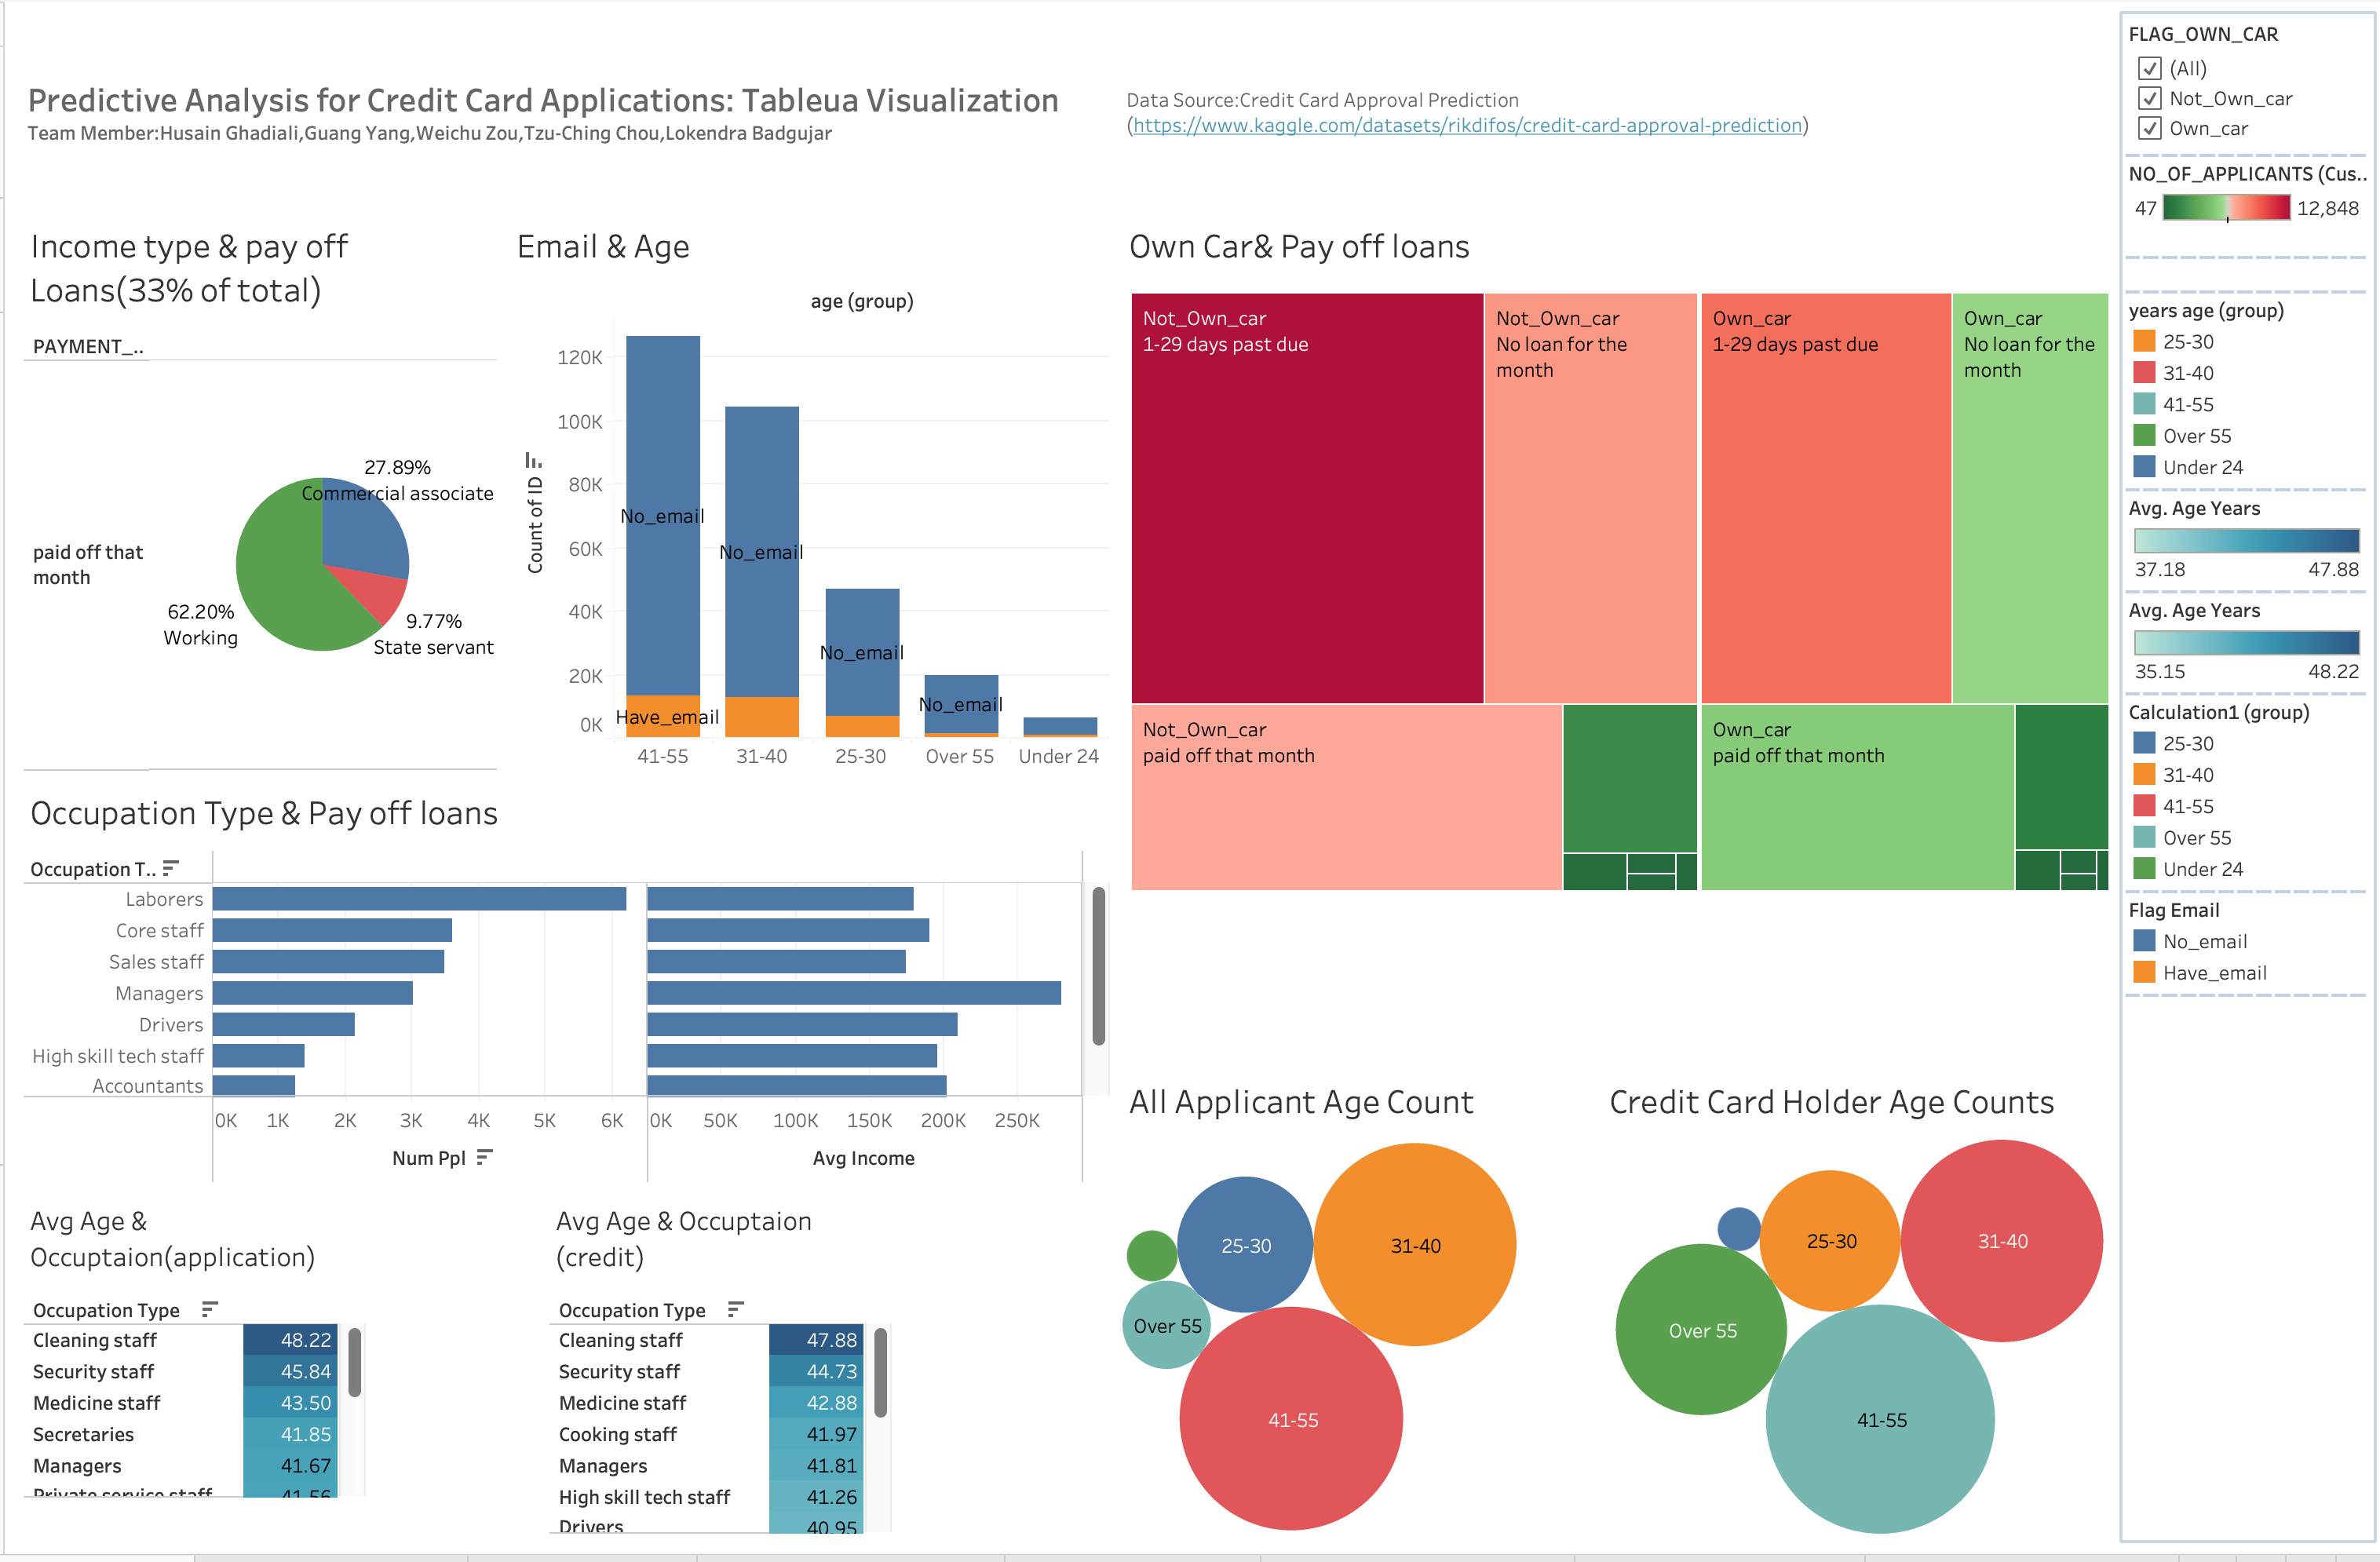

LINK:https://public.tableau.com/views/BA775Team3ProjectDashboard/PredictiveAnalysisforCreditCardApplications?:language=zh-CN&publish=yes&:display_count=n&:origin=viz_share_link

### 8. Conclusion

The credit card application analysis conducted by our team was completed successfully and as intended. Our motive for the project was to analyze and compare the data of the applicants applying for a credit card with the dataset of the people that already had a credit card. Our observation was that there wasn’t a significant difference in the demographics of the people that applied and those that got the credit card. However, we did notice some finer differences which proved to be insightful. The variables that were included in the dataset also gave us a detailed understanding of the kind of factors considered in the credit card industry.